In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.set_palette("GnBu_d")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression# create linear regression
from sklearn.model_selection import train_test_split #train test division to see the model accuracy

In [2]:
data = pd.read_csv('EPL_Soccer_MLR_LR.csv')

In [3]:
data.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


In [4]:
data.tail()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
197,"Ryan, Mr. Patrick",LIV,4.90,7.6,45.6,16.0,90,27.56,67.2,82.0,183.9,93.2,11.79
198,"Saad, Mr. Amin",LIV,5.66,8.3,50.2,17.7,38,23.76,56.5,72.0,183.5,80.0,10.05
199,"Saad, Mr. Khalil",LIV,5.03,6.4,42.7,14.3,122,22.01,47.6,68.0,183.1,73.8,8.51
200,"Saade, Mr. Jean Nassr",LIV,4.97,8.8,43.0,14.9,233,22.34,60.4,63.0,178.4,71.1,11.50
201,"Sadlier, Mr. Matthew",LIV,5.38,6.3,46.0,15.7,32,21.07,34.9,72.0,190.8,76.7,6.26


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [6]:
data.columns

Index(['PlayerName', 'Club', 'DistanceCovered(InKms)', 'Goals',
       'MinutestoGoalRatio', 'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost', 'Height', 'Weight', 'Score'],
      dtype='object')

In [7]:
data.isnull().sum()

PlayerName                0
Club                      0
DistanceCovered(InKms)    0
Goals                     0
MinutestoGoalRatio        0
ShotsPerGame              0
AgentCharges              0
BMI                       0
Cost                      0
PreviousClubCost          0
Height                    0
Weight                    0
Score                     0
dtype: int64

In [8]:
data.duplicated().sum() #check for duplicated

0

In [9]:
data.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


In [10]:
data.shape

(202, 13)

<Axes: xlabel='Score', ylabel='Density'>

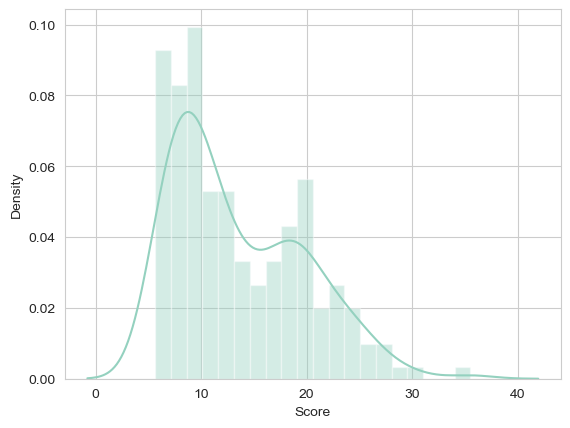

In [11]:
sns.distplot(data['Score'], bins=20)

<Axes: xlabel='MinutestoGoalRatio', ylabel='Score'>

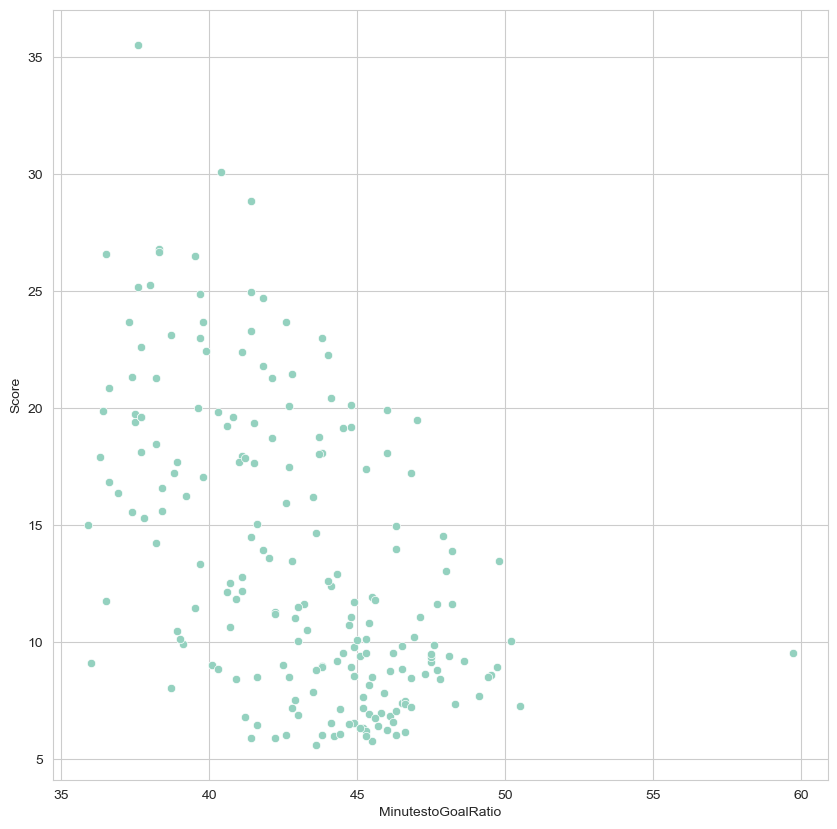

In [12]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data, x="MinutestoGoalRatio", y="Score")


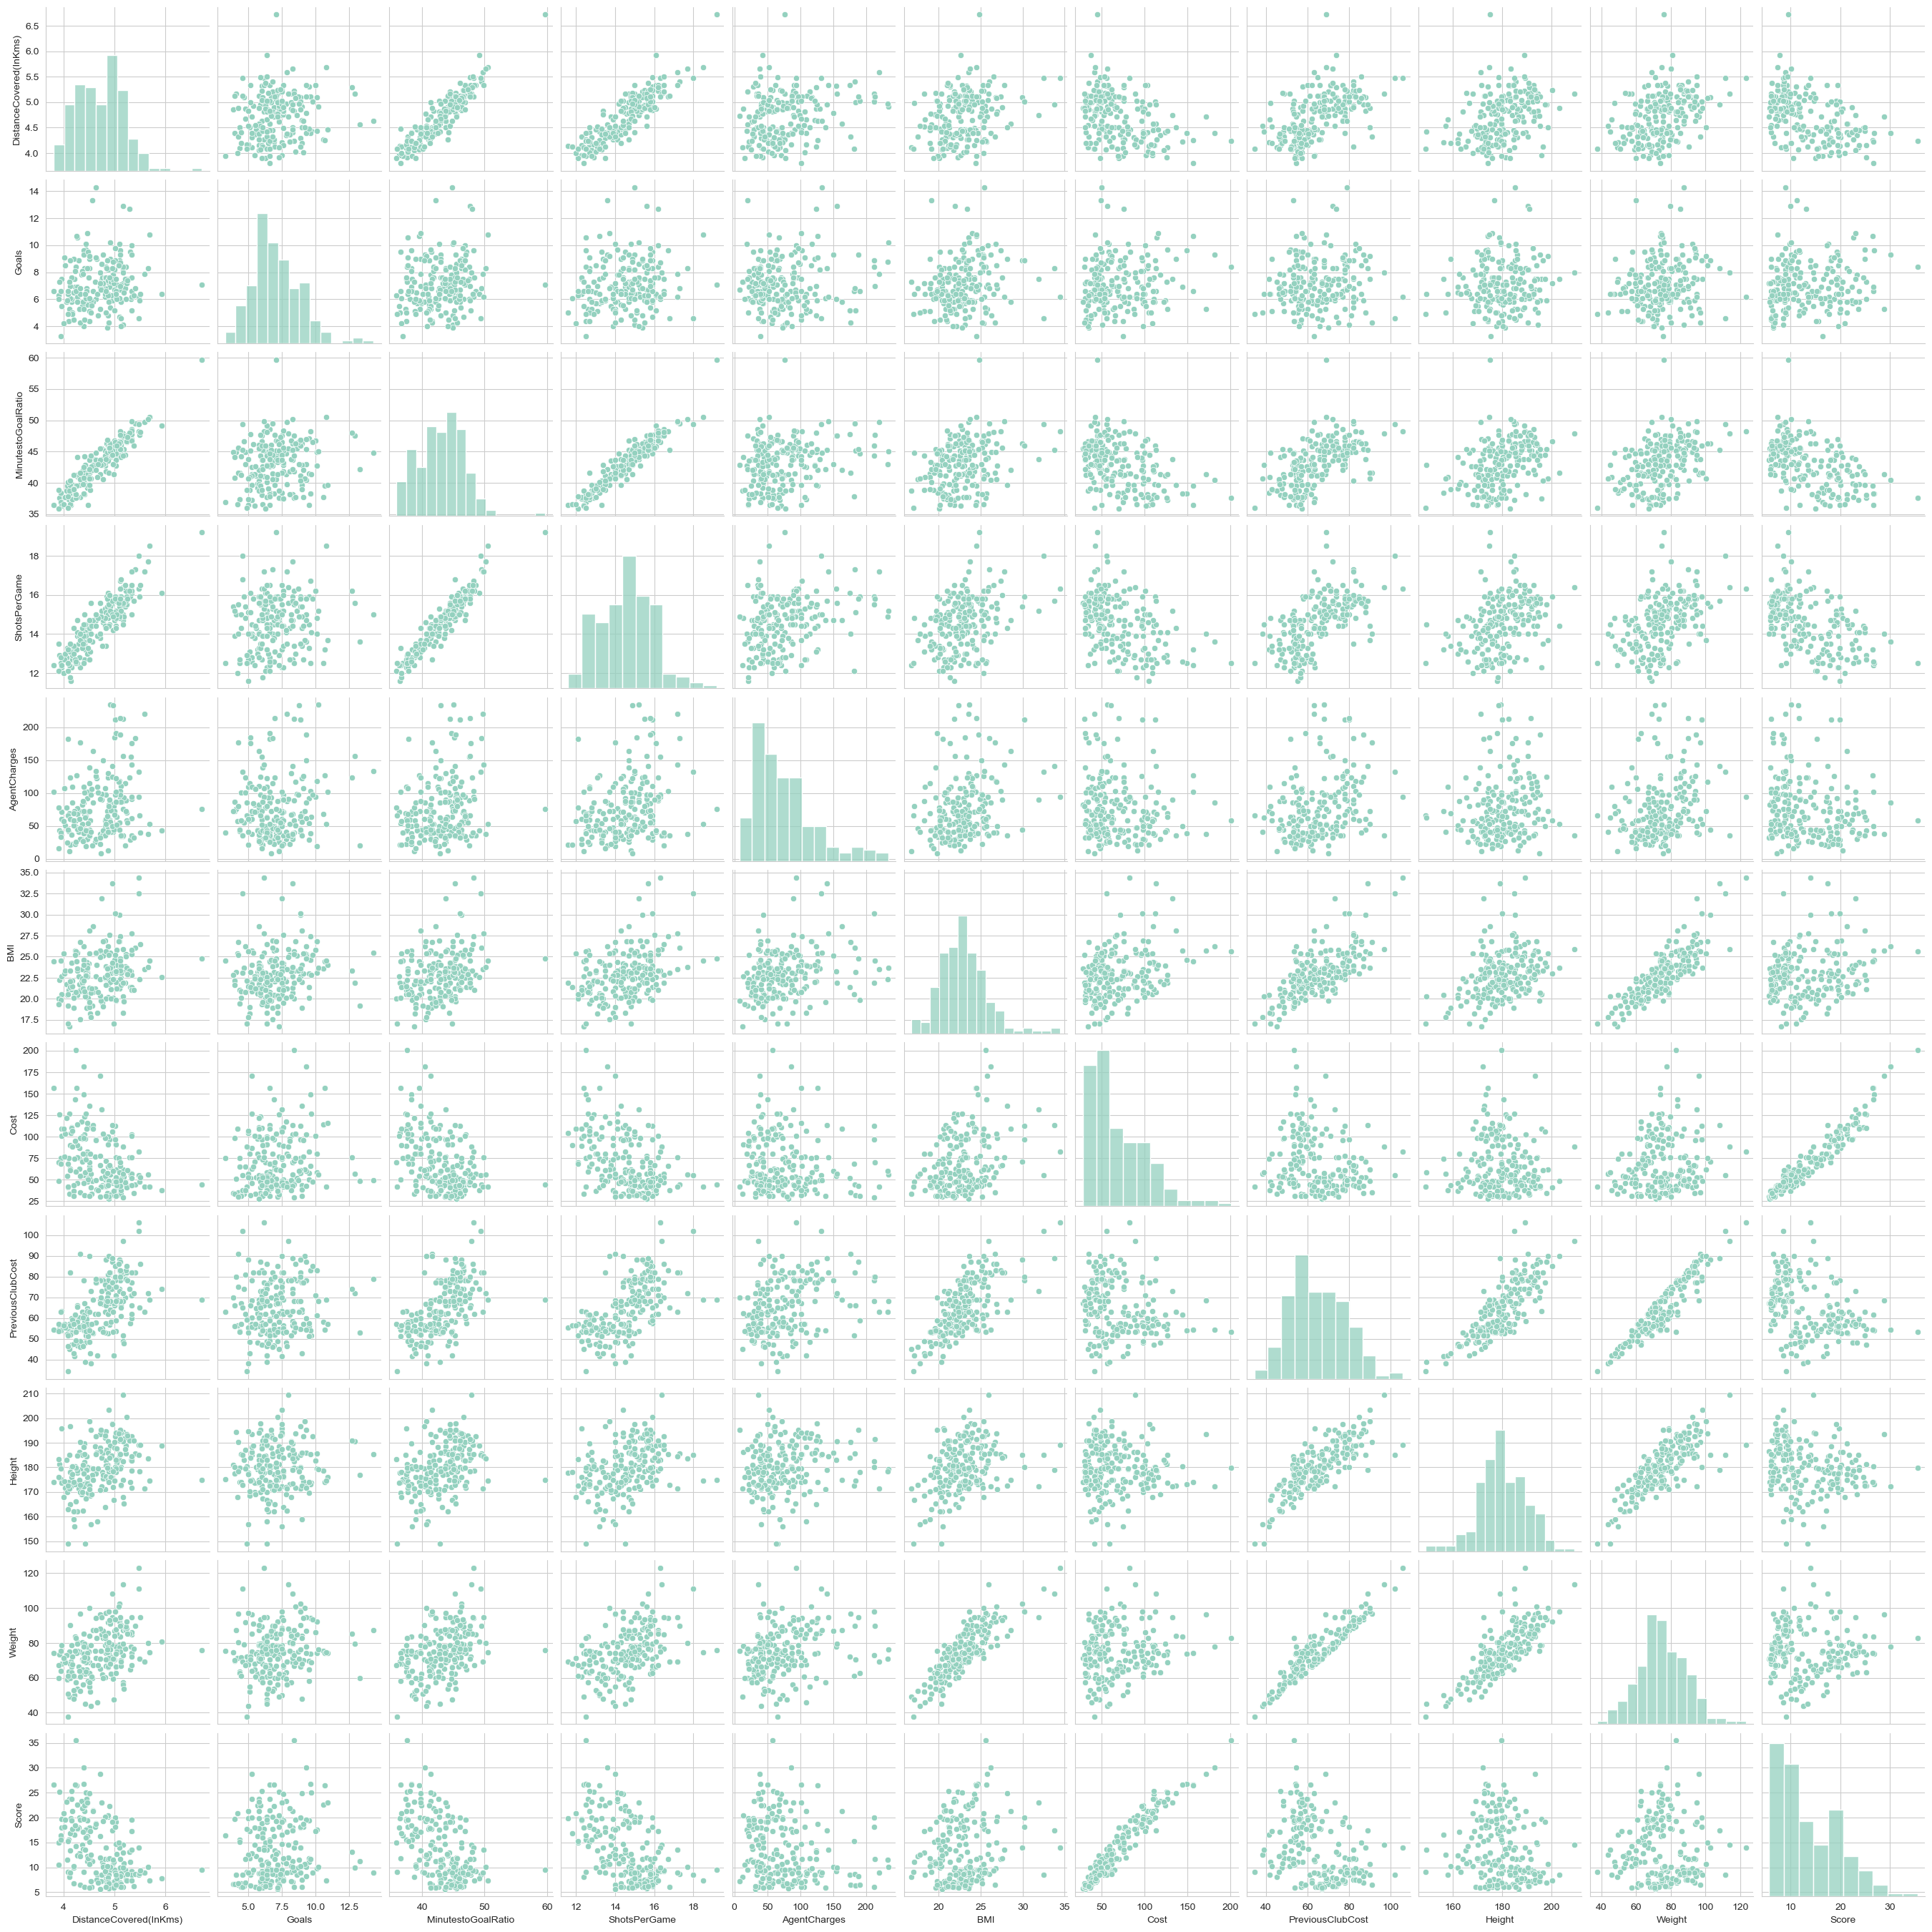

In [13]:
sns.pairplot(data)

In [14]:
sns.heatmap(data.corr(), annot=True) # correlation for data visuals

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [15]:
data.corr() # show correlation btw data

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


MODEL

In [17]:
data.drop("PlayerName", axis=1, inplace=True)
data.drop("Club", axis=1, inplace=True)

In [18]:
data.head(2)

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30


In [19]:
X = data.drop('Score', axis=1) #drop score and leave other colums, the independent 
y = data['Score'] #score column only the dependent

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=100)# testsize should be 20/30% of the
#dataset

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
y_pred

array([ 7.68240966,  7.87039163, 17.17427679, 11.02533558, 19.66162723,
        7.18306332,  8.39760554, 12.02339151, 13.39132281,  7.33050573,
        7.72142519,  9.56295805,  6.83377676, 15.16505766,  8.5534018 ,
       12.02817565,  7.17351647, 11.21061269, 19.92104076,  6.50016747,
        8.76624513, 12.05355256, 10.75045356,  6.86151151, 10.24450248,
       17.45905391, 19.33160694,  9.70559426, 19.48127989,  6.19720375,
        9.3236638 , 12.71798502,  9.95803685,  6.44840203, 20.68704306,
       12.30709175, 11.98703581,  7.74067491,  8.36762287, 23.78907569,
        8.5695009 , 11.02269677, 23.38638534, 13.04508806, 23.63068988,
       11.88152215,  8.62788118,  7.21900871, 22.01005075,  9.55074959,
       20.45149187, 31.09229977, 25.3627813 , 15.17189133, 20.6932462 ,
       21.0141424 , 17.09117184,  8.34926642, 10.28507875, 22.33018426,
        7.03124855])

In [25]:
from sklearn.metrics import r2_score# compares the prediction and test

In [26]:
print(r2_score(y_pred, y_test))

0.9772817645415933


In [ ]:
#rootmeansquare, mean square,mean absolute error